In [2]:
%load_ext autoreload
%autoreload 2
# Enable imports form top-level of project (edit top_level_path accordingly)
import os
import sys
import inspect

top_level_path = os.path.abspath(os.path.join('..'))
if top_level_path not in sys.path:
	sys.path.append(top_level_path)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from benchmarking import RandomParams, Benchmark, new_random_benchmark, Solver, new_graph_file_benchmark
import re

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
def generate():
  return [
    RandomParams(directed=True, num_vertices=50, average_degree=a) 
      for a in np.arange(1, 2.0, 0.1) for _ in range(100)
  ]

params_code = inspect.getsource(generate)
params_list = generate()

benchmark = new_random_benchmark(params_list, solvers=[
	Solver("brute", "FAST_BOUND"),
	Solver("brute", "BRUTE_FORCE"),
], params_code = params_code, override_benchmark_path="../benchmarks/test")

benchmark.benchmark_path

'../benchmarks/test(5)'

In [16]:
benchmark.run(retryFailures=False, timeout=10)


graph: 0.txt, solver: brute('FAST_BOUND') ... 

✅
length: 7, run_time: 1.1e-05
graph: 1.txt, solver: brute('FAST_BOUND') ... ✅
length: 5, run_time: 8e-06
graph: 2.txt, solver: brute('FAST_BOUND') ... ✅
length: 11, run_time: 1.8e-05
graph: 3.txt, solver: brute('FAST_BOUND') ... ✅
length: 15, run_time: 1.4e-05
graph: 4.txt, solver: brute('FAST_BOUND') ... ✅
length: 7, run_time: 8e-06
graph: 5.txt, solver: brute('FAST_BOUND') ... ✅
length: 17, run_time: 1.9e-05
graph: 6.txt, solver: brute('FAST_BOUND') ... ✅
length: 13, run_time: 1.4e-05
graph: 7.txt, solver: brute('FAST_BOUND') ... ✅
length: 9, run_time: 9e-06
graph: 8.txt, solver: brute('FAST_BOUND') ... ✅
length: 17, run_time: 1.2e-05
graph: 9.txt, solver: brute('FAST_BOUND') ... ✅
length: 9, run_time: 9e-06
graph: 10.txt, solver: brute('FAST_BOUND') ... ✅
length: 14, run_time: 1e-05
graph: 11.txt, solver: brute('FAST_BOUND') ... ✅
length: 8, run_time: 8e-06
graph: 12.txt, solver: brute('FAST_BOUND') ... ✅
length: 8, run_time: 8e-06
graph: 13.txt, solver: brute('FAST_BOUND') ... ✅
l

In [108]:
# name = os.path.splitext(os.path.basename(benchmark.benchmark_path))[0]

results = benchmark.results()
solver_names = [str(solver) for solver in benchmark.solvers]
graph_infos = benchmark.info["graph_infos"]
# pd.DataFrame(results)
solver_names

df = pd.DataFrame(results)
df["solver_name"] = df["solver"].apply(lambda i: solver_names[i])
# df["average_degree"] = df["graph_id"].apply(lambda id: graph_infos[id]['average_degree'])



<Axes: xlabel='average_degree', ylabel='specified_average_degree'>

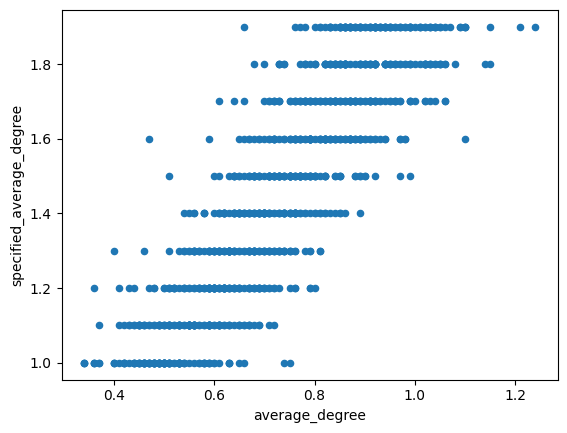

In [109]:
graph_data = pd.DataFrame([{"id" : id, "vertices": graph.vertices, "edges": len(graph.edges)} for id, graph in benchmark.graphs])
graph_data["average_degree"] = graph_data["edges"] / (2 * graph_data["vertices"])
graph_data["specified_average_degree"] = graph_data["id"].apply(lambda id: graph_infos[id]['average_degree'])

graph_data[["average_degree", "specified_average_degree"]].plot.scatter(x="average_degree", y="specified_average_degree")

<Axes: title={'center': 'average_degree'}, xlabel='[specified_average_degree]'>

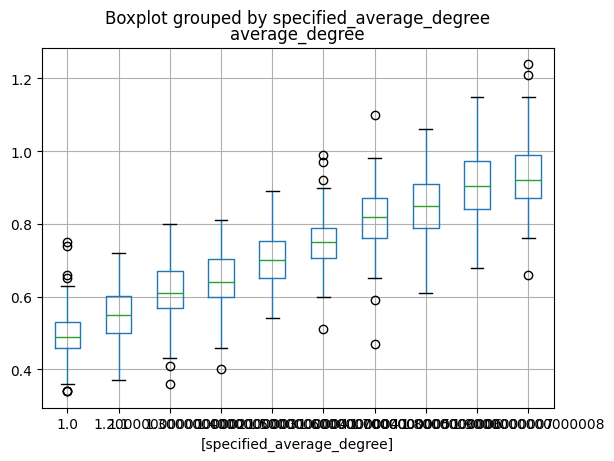

In [110]:
graph_data[["average_degree", "specified_average_degree"]].boxplot(by="specified_average_degree")


<Axes: ylabel='Frequency'>

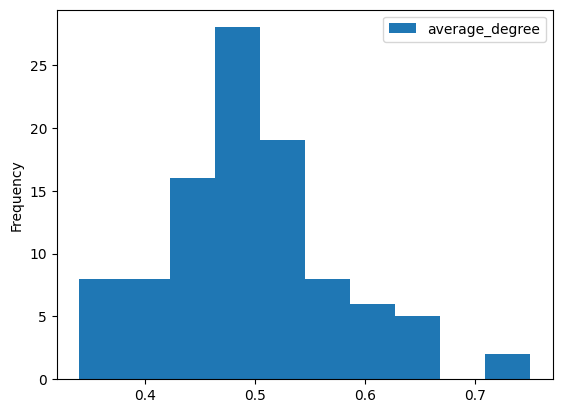

In [111]:
graph_data[graph_data["specified_average_degree"] == 1.0][["average_degree"]].plot.hist(bins=10)

In [115]:
df = pd.merge(df, graph_data, left_on="graph_id", right_on="id")

In [118]:
view = df[['specified_average_degree', 'solver_name','length', 'run_time']]

to_plot = df.groupby(['specified_average_degree', 'solver', 'solver_name']).agg({'run_time': 'mean'}).reset_index() \
    .pivot(index='specified_average_degree', columns='solver_name', values='run_time') \
    .rename(columns=lambda x: x + " (average)");


df

,path,run_time,length,solver,graph_id,solver_name,id,vertices,edges,average_degree,specified_average_degree
0,"[10, 38, 47, 40, 26, 37, 31, 7]",0.000011,7,0,0,brute('FAST_BOUND'),0,50,47,0.47,1.0
1,"[33, 41, 49, 32, 28, 29]",0.000008,5,0,1,brute('FAST_BOUND'),1,50,40,0.40,1.0
2,"[38, 48, 33, 34, 2, 12, 18, 15, 20, 22, 35, 32]",0.000018,11,0,2,brute('FAST_BOUND'),2,50,46,0.46,1.0
3,"[12, 44, 5, 48, 0, 20, 36, 31, 22, 38, 49, 13,...",0.000014,15,0,3,brute('FAST_BOUND'),3,50,51,0.51,1.0
4,"[1, 37, 44, 3, 23, 43, 7, 46]",0.000008,7,0,4,brute('FAST_BOUND'),4,50,44,0.44,1.0
...,...,...,...,...,...,...,...,...,...,...,...
1995,"[37, 48, 8, 19, 2, 22, 45, 28, 3, 35, 47, 27, ...",0.000812,27,1,995,brute('BRUTE_FORCE'),995,50,110,1.10,1.9
1996,"[12, 38, 11, 39, 17, 42, 37, 4, 10, 5, 28, 40,...",0.000627,28,1,996,brute('BRUTE_FORCE'),996,50,96,0.96,1.9
1997,"[35, 25, 47, 15, 41, 48, 3, 20, 14, 17, 16, 34...",0.000017,17,1,997,brute('BRUTE_FORCE'),997,50,85,0.85,1.9
1998,"[6, 35, 47, 49, 10, 45, 29, 28, 4, 11, 25, 5, ...",0.011542,34,1,998,brute('BRUTE_FORCE'),998,50,104,1.04,1.9


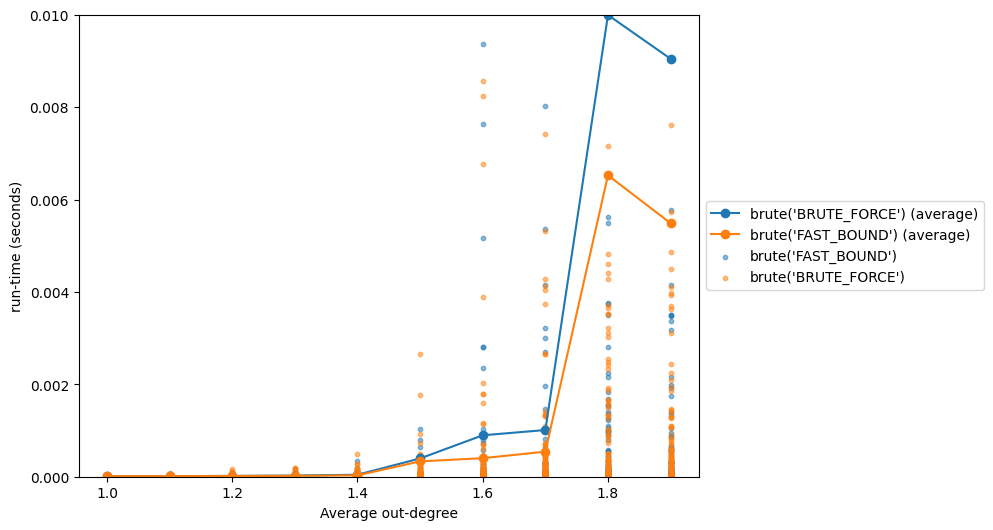

In [120]:
to_plot.plot(style="o-")

for solver_name in solver_names:
    solver_df = df[df["solver_name"] == solver_name]  # Select rows where run-time is not null
    plt.scatter(solver_df['specified_average_degree'], solver_df['run_time'], label=solver_name, alpha=0.5, s=10)

# plt.yscale('log')
# plt.xticks(np.arange(1, 4.0, 0.5))
plt.ylabel("run-time (seconds)")
plt.xlabel("Average out-degree")
# plt.title("Longest path solve-time for random directed graphs with 50 vertices")
# plt.axhline(y=0.015, color='black', linestyle='--', label='run-time cutoff', linewidth=1, alpha=0.5, zorder=0)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# df[df["solver"] == 0].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
# df[df["solver"] == 1].plot(x = "average_degree", y="run_time", style="--bo", label="solver_name")
plt.ylim(0, 0.010)

plt.gcf().set_size_inches(8, 6)
plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')

In [188]:
to_plot2 = df.groupby("solver").get_group(0)[["run_time", "average_degree"]].sort_values(by="average_degree")
to_plot2


,run_time,average_degree
36,0.000009,0.34
58,0.000007,0.34
39,0.000009,0.34
26,0.000009,0.36
249,0.000007,0.36
...,...,...
843,0.394656,1.14
859,0.047394,1.15
956,0.001344,1.15
931,0.245541,1.21


<Axes: xlabel='average_degree'>

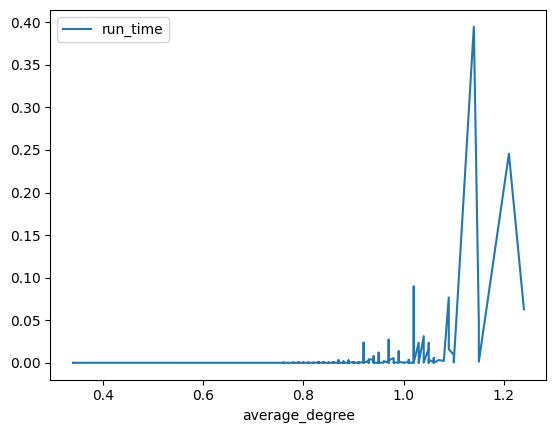

In [190]:
to_plot2.plot(x="average_degree", y="run_time")

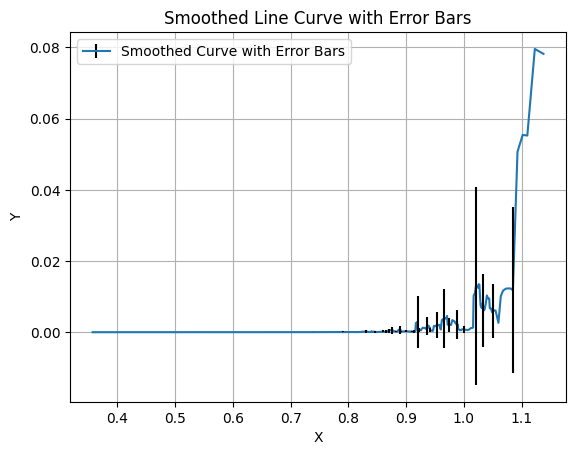

In [232]:
rolling_window = 10
df_smoothed = to_plot2.rolling(rolling_window, center=True).mean()
df_std = to_plot2.rolling(rolling_window, center=True).std()

# Plot the smoothed curve with error bars
plt.errorbar(df_smoothed['average_degree'], df_smoothed['run_time'], yerr=df_std['run_time'], label='Smoothed Curve with Error Bars', errorevery=10, barsabove=True, ecolor="black")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Smoothed Line Curve with Error Bars')
plt.legend()
plt.grid(True)
plt.show()

In [121]:
benchmark = Benchmark.load("../benchmarks/rob-top2000")
name = os.path.splitext(os.path.basename(benchmark.benchmark_path))[0]

results = benchmark.results()
solver_names = [str(solver) for solver in benchmark.solvers]
graph_infos = benchmark.info["graph_infos"]

df = pd.DataFrame(results)
df["solver_name"] = df["solver"].apply(lambda i: solver_names[i])

ax = df.plot.bar(x="solver_name", y="run_time") \

for i, value in enumerate(df["run_time"]):
    ax.text(i, value, f'{value:.2f}', ha='center', va='bottom')  # Display value at the top of the bar


ax.tick_params(axis='x', labelrotation=0)
plt.ylabel("run-time (seconds)")
plt.title("Longest path solve-time for Top 2000 songs graph")

plt.gcf().set_size_inches(12, 6)
plt.savefig(os.path.join(benchmark.benchmark_path, "plot.png"), dpi=400, bbox_inches='tight')

FileNotFoundError: [Errno 2] No such file or directory: '../benchmarks/rob-top2000/info.json'